<a href="https://colab.research.google.com/github/IT21174230/ML-Journey/blob/main/DecisionTreeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset='/content/drive/MyDrive/waterquality/waterQuality1.csv'

import pandas as pd
dataframe=pd.read_csv(dataset)

data=dataframe.head()
data

print(dataframe.dtypes)

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object


In [4]:
dataframe.replace('#NUM!', pd.NA, inplace=True)
dataframe.dropna(inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [7]:
dataframe.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [11]:
X=dataframe.drop(columns=['is_safe'])
y=dataframe['is_safe']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)

(5997, 20)
(5997,)


In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report


In [18]:
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)

training_classes=clf.predict(X_train)
testing_classes=clf.predict(X_test)

In [19]:
training_acc=accuracy_score(y_train, training_classes)
testing_acc=accuracy_score(y_test, testing_classes)

print(f"training accuracy:{training_acc}")
print(f"testing accuracy:{testing_acc}")


training accuracy:1.0
testing accuracy:0.9489744872436218


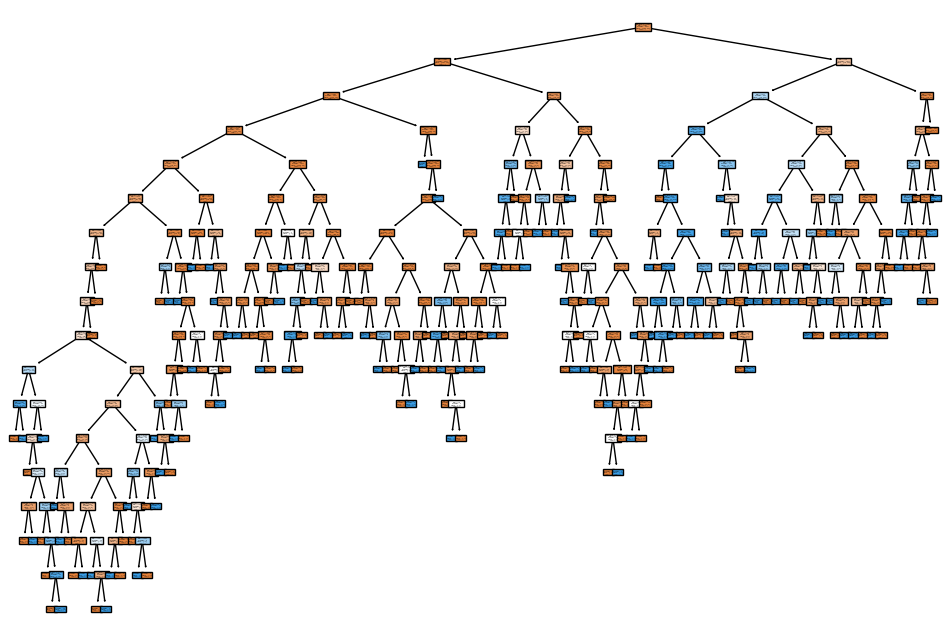

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=dataframe['is_safe'].unique())
plt.show()

In [26]:
print(f"tree depth:{clf.get_depth()}")

tree depth:17


# **hyperparameter tuning to prevent overfitting**

In [31]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'min_samples_split':[10, 15, 20, 25, 30, 35, 40, 45, 45, 50]
}

model=DecisionTreeClassifier()

grid_search=GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16],
                         'min_samples_split': [10, 15, 20, 25, 30, 35, 40, 45,
                                               45, 50]},
             scoring='accuracy')

In [38]:
print(grid_search.best_params_)
train_pred=grid_search.best_estimator_.predict(X_train)
trainacc=accuracy_score(y_train, train_pred)
test_pred=grid_search.best_estimator_.predict(X_test)
testacc=accuracy_score(y_test, test_pred)

print(f"training accuracy(%):{trainacc*100}")
print(f"testing accuracy(%):{testacc*100}")

print(f"depth:{grid_search.best_estimator_.get_depth()}")

{'max_depth': 12, 'min_samples_split': 30}
training accuracy(%):97.68217442054362
testing accuracy(%):95.59779889944973
depth:12


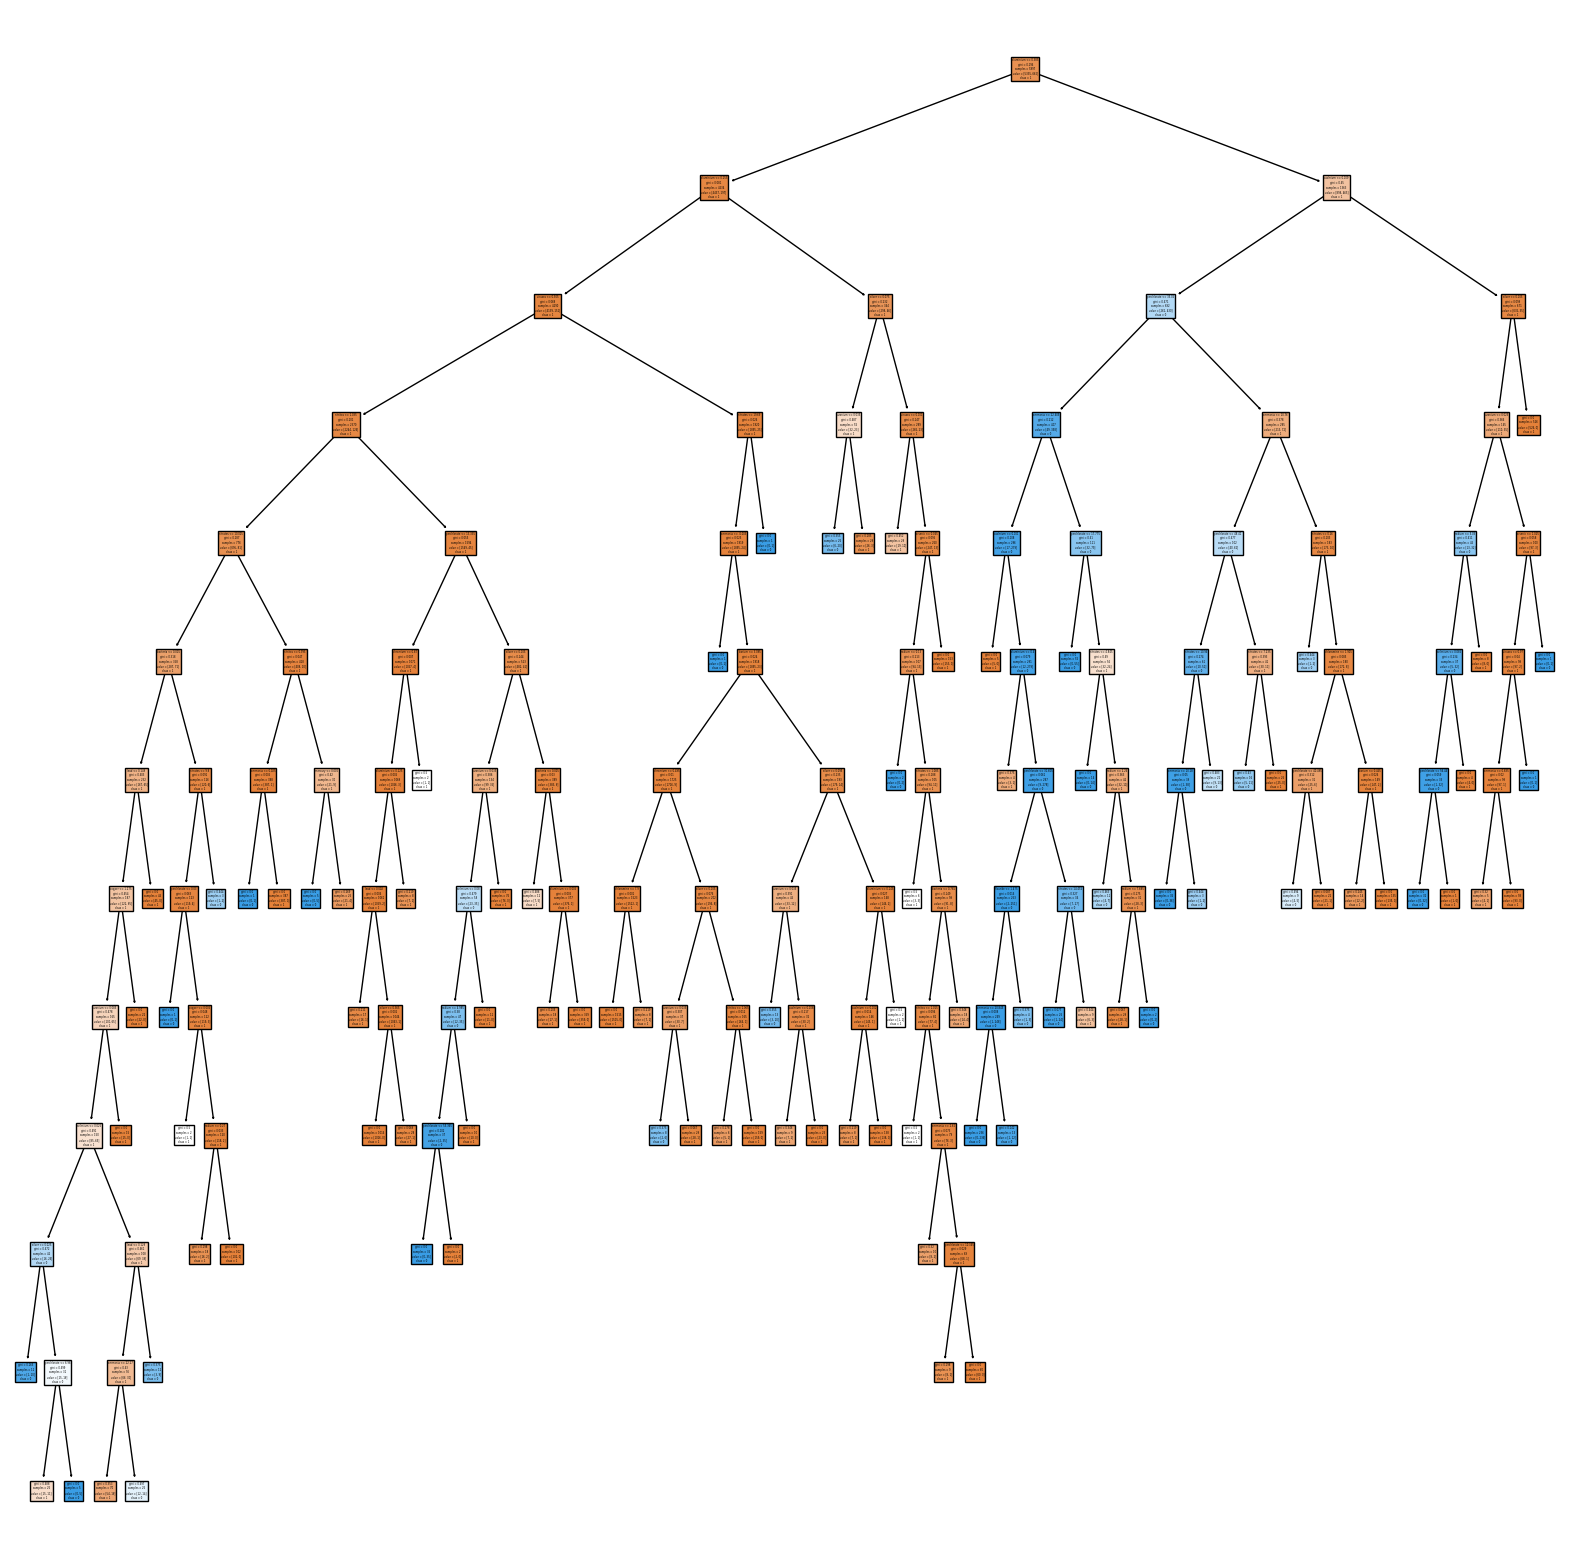

In [39]:
plt.figure(figsize=(20,20))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=X.columns, class_names=dataframe['is_safe'].unique())
plt.show()